In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from hmmlearn import hmm


In [2]:

# Hidden Markov Model Modifiable Parameters
hidden_states = 2;
em_iterations = 75;
num_models = 8;

In [3]:
df = pd.read_csv('SPY.csv')

In [4]:
# Volatility is computed by obtaining variance between current close and prices of past 10 days
Volatility = []

# MA is the 10 day SMA
MA = []

# Return is the single-day percentage return
Return = []
ma_sum = 0;

# Warming up data for moving average and volatility calculations
for i in range (0, 10):
    Volatility.append(0);
    MA.append(0);
    Return.append(0);
    ma_sum += df['Close'][i];

# Filling in data for return, moving average, and volatility
for ind in df.index: 
    if ind >= 10:
        tail_close = df['Close'][ind-10];
        prev_close = df['Close'][ind-1];
        head_close = df['Close'][ind];
        ma_sum = (ma_sum - tail_close + head_close);
        ma_curr = ma_sum/10;
        MA.append(ma_curr);
        Return.append(((head_close-prev_close)/prev_close)*100);
        #Computing Volatility
        vol_sum = 0;
        for i in range (0,10):
            curr_vol = abs(ma_curr - df['Close'][ind-i]);
            vol_sum += (curr_vol ** 2);
        Volatility.append(vol_sum/10);

In [5]:
# Adding columns to dataframe
df['Volatility'] = Volatility;
df['MA'] = MA; #moving average
df['Return'] = Return;

In [6]:
df.shape
df.index


RangeIndex(start=0, stop=6841, step=1)

In [7]:
# Dataframe readjustment
total_length = 6841
#drop_length = 3500
training_length = 5473 #80% of total_length

# total = test + drop + training
test_length = total_length - training_length

#test_length = total_length - drop_length - training_length
#Test = 635
data_length = training_length+test_length
#df = df.drop(range(0, drop_length));
df.index = range(0, data_length);

In [8]:
df.index
#df => training + test 

RangeIndex(start=0, stop=6841, step=1)

In [9]:
# Creating testing and training dataset
# 2000 datapoints in training, 838 datapoints in test
test = pd.DataFrame(df, index = range(training_length, data_length))
test.index = range(0,test_length)
training = df.drop(range(training_length, data_length))

In [10]:
training.shape, test.shape


((5473, 10), (1368, 10))

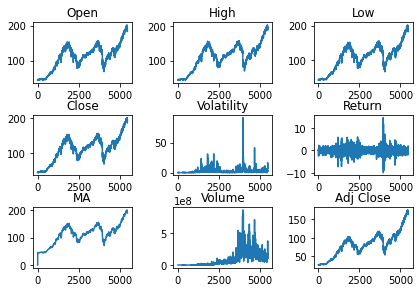

In [11]:
fig, a =  plt.subplots(3,3)
x = np.arange(1,5)
fig.tight_layout()
a[0][0].plot(range(0,training_length), training.iloc[:,1])
a[0][0].set_title('Open')
a[0][1].plot(range(0,training_length), training.iloc[:,2])
a[0][1].set_title('High')
a[0][2].plot(range(0,training_length), training.iloc[:,3])
a[0][2].set_title('Low')
a[1][0].plot(range(0,training_length), training.iloc[:,4])
a[1][0].set_title('Close')
a[1][1].plot(range(0,training_length), training.iloc[:,7])
a[1][1].set_title('Volatility')
a[1][2].plot(range(0,training_length), training.iloc[:,9])
a[1][2].set_title('Return')
a[2][0].plot(range(0,training_length), training.iloc[:,8])
a[2][0].set_title('MA')
a[2][1].plot(range(0,training_length), training.iloc[:,6])
a[2][1].set_title('Volume')
a[2][2].plot(range(0,training_length), training.iloc[:,5])
a[2][2].set_title('Adj Close')
plt.show()

In [12]:
# Creating the Hidden Markov Model
model = hmm.GaussianHMM(n_components = hidden_states, covariance_type="full", n_iter = em_iterations);
vol = training.iloc[:,7];
ret = training.iloc[:,9];
obs = [];
for i in range(0, len(vol)):
    arr = [];
    arr.append(vol[i]);
    arr.append(ret[i]);
    obs.append(arr);

# Fitting the model and obtaining predictions
model.fit(obs)
predictions = model.predict(obs)


In [13]:
model

GaussianHMM(covariance_type='full', n_components=2, n_iter=75)

In [14]:
import sys
np.set_printoptions(threshold=sys.maxsize)
predictions
len(predictions)

#training_length = 5473

5473

In [34]:
test

,Date,Open,High,Low,Close,Adj Close,Volume,Volatility,MA,Return
0,10/23/2014,194.619995,196.199997,194.259995,194.929993,170.783539,154944000,8.934269,189.881000,1.162484
1,10/24/2014,195.250000,196.490005,194.490005,196.429993,172.097763,117927000,12.832852,190.470000,0.769507
2,10/27/2014,195.729996,196.449997,195.029999,196.160004,171.861160,82954000,14.368485,191.345000,-0.137448
3,10/28/2014,196.820007,198.419998,196.729996,198.410004,173.832474,106736000,16.884266,192.416000,1.147023
4,10/29/2014,198.550003,199.119995,196.800003,198.110001,173.569626,142557000,15.178976,193.584001,-0.151204
5,10/30/2014,197.580002,199.949997,197.399994,199.380005,174.682312,113330000,11.470166,194.895001,0.641060
6,10/31/2014,201.779999,201.820007,200.770004,201.660004,176.679871,146903000,10.178867,196.214002,1.143544
7,11/3/2014,201.919998,202.449997,201.309998,201.770004,176.776245,93600000,8.452636,197.361002,0.054547
8,11/4/2014,201.229996,201.600006,200.059998,201.070007,176.162979,93343000,8.255244,198.061002,-0.346928
9,11/5/2014,202.539993,202.589996,201.449997,202.339996,177.275665,91709000,6.270235,199.026001,0.631615


In [15]:
training['predictions'] = predictions
import sys
np.set_printoptions(threshold=sys.maxsize)
training.iloc[3600:4000,:]

pd.set_option("display.max_rows", None, "display.max_columns", None)

sum(training.loc[:,'predictions'] == training.loc[:,'predictions'].shift(1))
5473-5277

196

In [16]:
training['Date'] = pd.to_datetime(training['Date'])
#training

In [17]:
start_date_2000 = '2000-01-03'
end_date_2007 = '2006-12-31'

after_start_date_2000 = training['Date'] >= start_date_2000
before_end_date_2007 = training['Date'] <= end_date_2007

filter_dates_1 = training.loc[after_start_date_2000 & before_end_date_2007]
filter_dates_1.shape

(1759, 11)

60

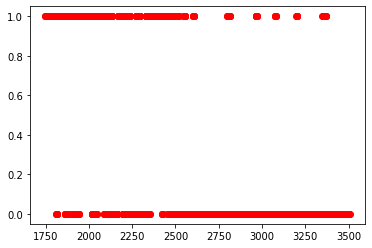

In [31]:
plt.plot(filter_dates_1['predictions'],'ro')
sum(filter_dates_1.loc[:,'predictions'] == filter_dates_1.loc[:,'predictions'].shift(1))
#Number of Shifts during 2000 to 2007
filter_dates_1.shape[0] - sum(filter_dates_1.loc[:,'predictions'] == filter_dates_1.loc[:,'predictions'].shift(1))



In [19]:
start_date_2007 = '2007-01-03'
end_date_2009 = '2009-12-31'
after_start_date_2007 = training['Date'] >= start_date_2007
before_end_date_2009 = training['Date'] <= end_date_2009

filter_dates_2 = training.loc[after_start_date_2007 & before_end_date_2009]
filter_dates_2.shape

(756, 11)

37

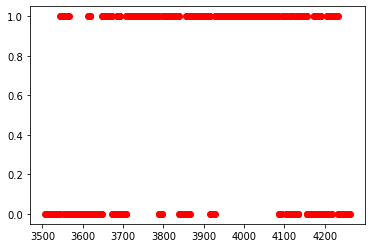

In [32]:
plt.plot(filter_dates_2['predictions'],'ro')
sum(filter_dates_2.loc[:,'predictions'] == filter_dates_2.loc[:,'predictions'].shift(1))
#Number of Shifts during 2000 to 2007
filter_dates_2.shape[0] - sum(filter_dates_2.loc[:,'predictions'] == filter_dates_2.loc[:,'predictions'].shift(1))



In [21]:
start_date_2010 = '2010-01-04'
end_date_2014 = '2014-10-22'

after_start_date_2010 = training['Date'] >= start_date_2010
before_end_date_2014 = training['Date'] <= end_date_2014

filter_dates_3 = training.loc[after_start_date_2010 & before_end_date_2014]
filter_dates_3.shape

(1210, 11)

64

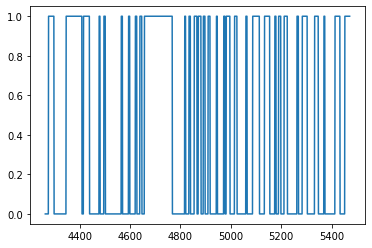

In [22]:
plt.plot(filter_dates_3['predictions'])
sum(filter_dates_3.loc[:,'predictions'] == filter_dates_3.loc[:,'predictions'].shift(1))
#Number of Shifts during 2010 to 2014
filter_dates_3.shape[0] - sum(filter_dates_3.loc[:,'predictions'] == filter_dates_3.loc[:,'predictions'].shift(1))


In [23]:
# Regime Classification
regime_vol = [];
regime_ret = [];
regime_count = [];
return_map = {};

for i in range(0, hidden_states):
    regime_vol.append(0);
    regime_ret.append(0);
    regime_count.append(0);

for i in range(0, len(predictions)):
    regime_count[predictions[i]] += 1;
    regime_vol[predictions[i]] += training.iloc[i, 7];
    regime_ret[predictions[i]] += training.iloc[i, 9];
    
    if not predictions[i] in return_map:
        return_map[predictions[i]] = [];
    return_map[predictions[i]].append(training.iloc[i,9]);
    
for i in range(0, hidden_states):
    regime_vol[i] = regime_vol[i] / regime_count[i];
    regime_ret[i] = regime_ret[i] / regime_count[i];

In [24]:

max_occurrence = np.argmax(regime_count)
for i in range(0, hidden_states):
    print("Regime {0}".format(i))
    print("Avg Vol: {0}".format(regime_vol[i]));
    print("Avg Return: {0}".format(regime_ret[i]));
    print("Occurrence: {0}\n".format(regime_count[i]));

Regime 0
Avg Vol: 0.8090876510545043
Avg Return: 0.04333054730831049
Occurrence: 3596

Regime 1
Avg Vol: 5.66558519476158
Avg Return: 0.016091218490033424
Occurrence: 1877



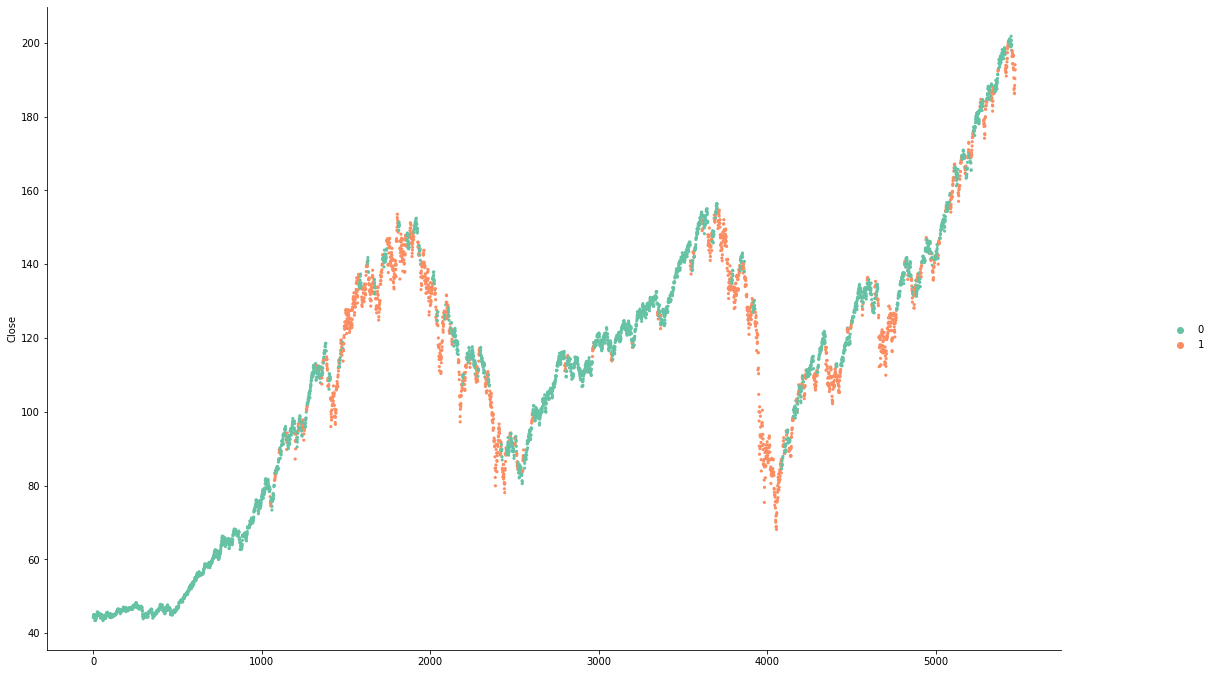

In [25]:

plot = sns.relplot(x=range(0,training_length), y="Close", data=training, hue=predictions, 
            linewidth = 0, palette="Set2", s = 10);
plot.fig.set_size_inches(18,10)

In [26]:
returns = pd.DataFrame(data = return_map[max_occurrence])
for i in range(0, hidden_states):
    if(i is not max_occurrence):
        returns[i] = pd.Series(return_map[i]);

#sns.pairplot(data = returns, height=3);

In [27]:
distribution = model.get_stationary_distribution();
for i in range(0, hidden_states):
    print("Regime {0}: {1}".format(i, distribution[i]));

Regime 0: 0.6535313909320385
Regime 1: 0.3464686090679615


In [28]:
print("Model Score: {0}".format(model.score(obs)));


Model Score: -18062.1606319463


[Text(1, 0, '0'), Text(2, 0, '1')]

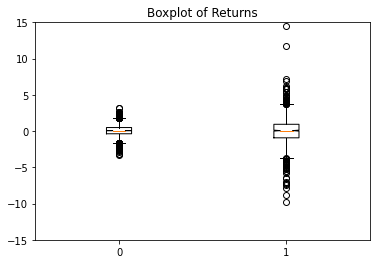

In [29]:
# Boxplot of returns
fig, ax = plt.subplots()
ax.set(ylim=(-15, 15))
ax.set_title("Boxplot of Returns")
ax.boxplot(return_map.values(), notch=True, vert = True, autorange = True)
ax.set_xticklabels(return_map.keys())